In [1]:
library(tidyverse,warn.conflicts = FALSE)

Warning message:
"package 'ggplot2' was built under R version 4.3.3"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
auto_data <- read.csv("automobile.data", header = FALSE, na.strings = "?")

#### Basic Data Exploration

In [3]:
head(auto_data)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
2,3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
3,1,NA,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,2,NA,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [4]:
tail(auto_data)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
200,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,⋯,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,⋯,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
202,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,⋯,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
203,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,⋯,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
204,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,⋯,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
205,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,⋯,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [5]:
dim(auto_data)

[1] 205  26

In [6]:
# Check data types
str(auto_data)

'data.frame':	205 obs. of  26 variables:
 $ V1 : int  3 3 1 2 2 2 1 1 1 0 ...
 $ V2 : int  NA NA NA 164 164 NA 158 NA 158 NA ...
 $ V3 : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ V4 : chr  "gas" "gas" "gas" "gas" ...
 $ V5 : chr  "std" "std" "std" "std" ...
 $ V6 : chr  "two" "two" "two" "four" ...
 $ V7 : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ V8 : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ V9 : chr  "front" "front" "front" "front" ...
 $ V10: num  88.6 88.6 94.5 99.8 99.4 ...
 $ V11: num  169 169 171 177 177 ...
 $ V12: num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ V13: num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 ...
 $ V14: int  2548 2548 2823 2337 2824 2507 2844 2954 3086 3053 ...
 $ V15: chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ V16: chr  "four" "four" "six" "four" ...
 $ V17: int  130 130 152 109 136 136 136 136 131 131 ...
 $ V18: chr  "mpfi" "mpfi" "mpfi" "mpfi" ...
 $ V19: num  3.47 3.47 2.68 3.19 3.19 3.19 3.19 3.19 3.13 

In [7]:
names(auto_data)

[1] "V1"  "V2"  "V3"  "V4"  "V5"  "V6"  "V7"  "V8"  "V9"  "V10" "V11" "V12"
[13] "V13" "V14" "V15" "V16" "V17" "V18" "V19" "V20" "V21" "V22" "V23" "V24"
[25] "V25" "V26"

In [8]:
# change the names of columns of the auto_data dataframe

colnames(auto_data) <- c("symboling", "normalized_losses", "make", "fuel_type", "aspiration", "num_doors", 
                         "body_style", "drive_wheels", "engine_location", "wheel_base", "length", "width", 
                         "height", "curb_weight", "engine_type", "num_cylinders", "engine_size", "fuel_system", 
                         "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm", "city_mpg", 
                         "highway_mpg", "price")

In [9]:
names(auto_data)

[1] "symboling"         "normalized_losses" "make"             
 [4] "fuel_type"         "aspiration"        "num_doors"        
 [7] "body_style"        "drive_wheels"      "engine_location"  
[10] "wheel_base"        "length"            "width"            
[13] "height"            "curb_weight"       "engine_type"      
[16] "num_cylinders"     "engine_size"       "fuel_system"      
[19] "bore"              "stroke"            "compression_ratio"
[22] "horsepower"        "peak_rpm"          "city_mpg"         
[25] "highway_mpg"       "price"

In [10]:
# Check for missing values
colSums(is.na(auto_data))

symboling normalized_losses              make         fuel_type 
                0                41                 0                 0 
       aspiration         num_doors        body_style      drive_wheels 
                0                 2                 0                 0 
  engine_location        wheel_base            length             width 
                0                 0                 0                 0 
           height       curb_weight       engine_type     num_cylinders 
                0                 0                 0                 0 
      engine_size       fuel_system              bore            stroke 
                0                 0                 4                 4 
compression_ratio        horsepower          peak_rpm          city_mpg 
                0                 2                 2                 0 
      highway_mpg             price 
                0                 4

#### Impute the missing value

In [11]:
auto_data <- auto_data %>% 
  mutate(
    num_doors = ifelse(is.na(num_doors), names(which.max(table(auto_data$num_doors))), num_doors),
    bore = ifelse(is.na(bore), median(bore, na.rm = TRUE), bore),
    stroke = ifelse(is.na(stroke), median(stroke, na.rm = TRUE), stroke),
    horsepower = ifelse(is.na(horsepower), mean(horsepower, na.rm = TRUE), horsepower),
    peak_rpm = ifelse(is.na(peak_rpm), median(peak_rpm, na.rm = TRUE), peak_rpm),
    price = ifelse(is.na(price), median(price, na.rm = TRUE), price)
)

In [12]:
head(auto_data)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,⋯,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
2,3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
3,1,NA,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,2,NA,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [13]:
# Check for missing values
colSums(is.na(auto_data))

symboling normalized_losses              make         fuel_type 
                0                41                 0                 0 
       aspiration         num_doors        body_style      drive_wheels 
                0                 0                 0                 0 
  engine_location        wheel_base            length             width 
                0                 0                 0                 0 
           height       curb_weight       engine_type     num_cylinders 
                0                 0                 0                 0 
      engine_size       fuel_system              bore            stroke 
                0                 0                 0                 0 
compression_ratio        horsepower          peak_rpm          city_mpg 
                0                 0                 0                 0 
      highway_mpg             price 
                0                 0

In [14]:
# impute the missing vaue normalized_losses
auto_data <- auto_data %>% 
  mutate(normalized_losses = replace_na(normalized_losses, mean(normalized_losses, na.rm = TRUE)))

auto_data$num_doors[is.na(auto_data$num_doors)] <- names(which.max(table(auto_data$num_doors)))


In [15]:
# Check for missing values
colSums(is.na(auto_data))

symboling normalized_losses              make         fuel_type 
                0                 0                 0                 0 
       aspiration         num_doors        body_style      drive_wheels 
                0                 0                 0                 0 
  engine_location        wheel_base            length             width 
                0                 0                 0                 0 
           height       curb_weight       engine_type     num_cylinders 
                0                 0                 0                 0 
      engine_size       fuel_system              bore            stroke 
                0                 0                 0                 0 
compression_ratio        horsepower          peak_rpm          city_mpg 
                0                 0                 0                 0 
      highway_mpg             price 
                0                 0

#### Basic EDA

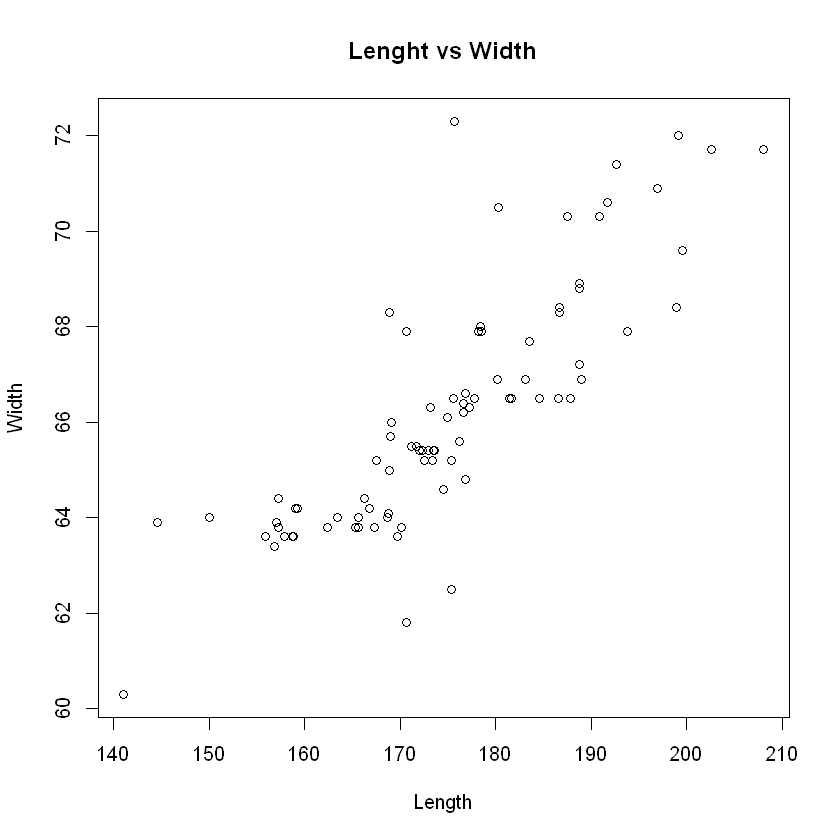

In [16]:
# relationship between leghth and width of automobile
plot(auto_data$length, auto_data$width, main='Lenght vs Width', xlab = 'Length', ylab = 'Width')


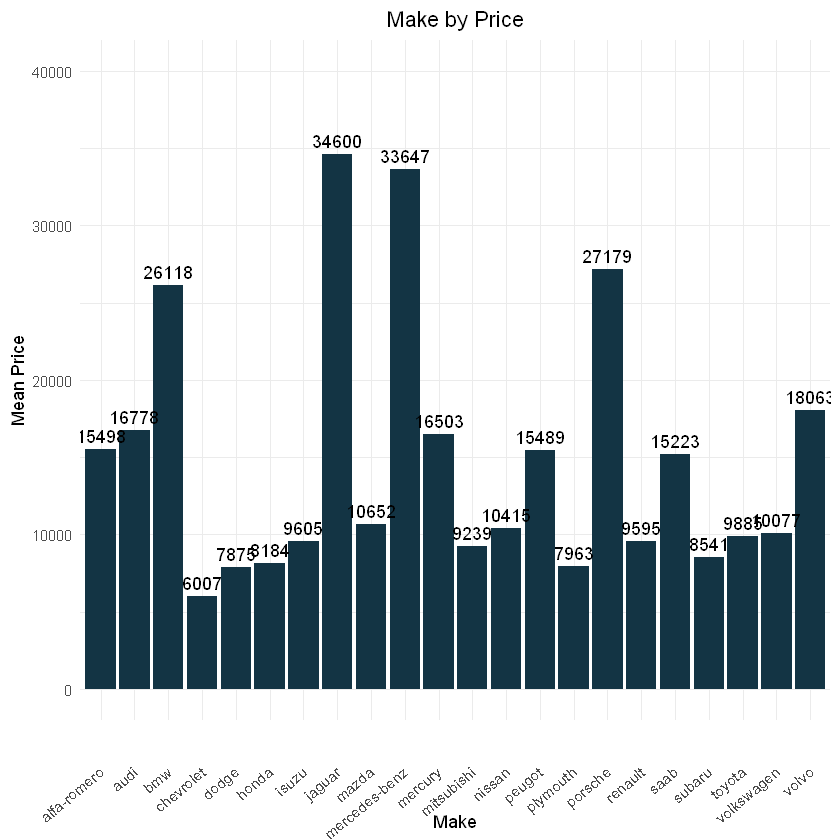

In [17]:
# Relationship between price and make
# # Mean price by make
make_price <- as_tibble(aggregate(price ~ make, auto_data, mean))
make_price$price <- as.integer(make_price$price)

ggplot(make_price, aes(x = make, y = price)) +
  geom_bar(stat = "identity", fill = "#133444") +
  geom_text(aes(label = price), vjust = -0.5) + 
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 40, vjust = 0.5, hjust = 1),
    plot.title = element_text(hjust = 0.5))+
  ylim(0,40000)+
  labs(x = "Make", y = "Mean Price", title = "Make by Price")

  

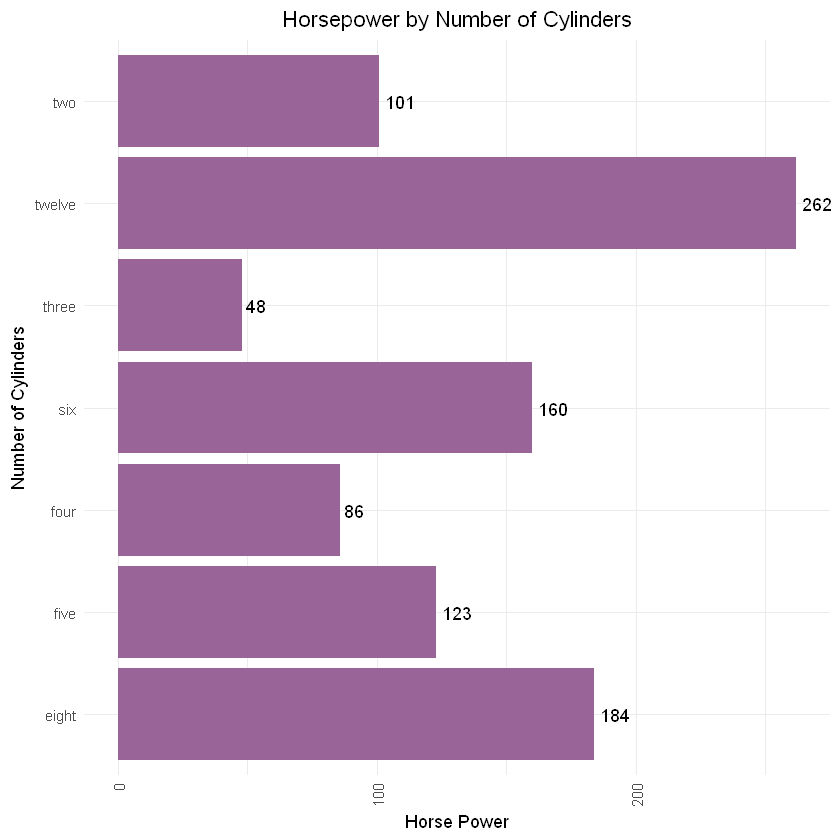

In [18]:
# Relationship Between Horsepower and Cylinders
# Median horsepower by number of cylinders
hp_cyl<- as_tibble(aggregate(horsepower ~ num_cylinders, auto_data, median))
ggplot(hp_cyl, aes(x = horsepower, y = num_cylinders)) +
  geom_bar(stat = "identity", fill = "#996498") +
  geom_text(aes(label = horsepower), vjust = 0.5, hjust = -0.2) + 
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
    plot.title = element_text(hjust = 0.5))+
  labs(x = "Horse Power", y = "Number of Cylinders", title = "Horsepower by Number of Cylinders")

In [19]:
# Does fuel type impacts mileage between road types
aggregate(cbind(city_mpg, highway_mpg) ~ fuel_type, auto_data, sd)


fuel_type,city_mpg,highway_mpg
<chr>,<dbl>,<dbl>
diesel,6.610199,8.626001
gas,6.311173,6.555028


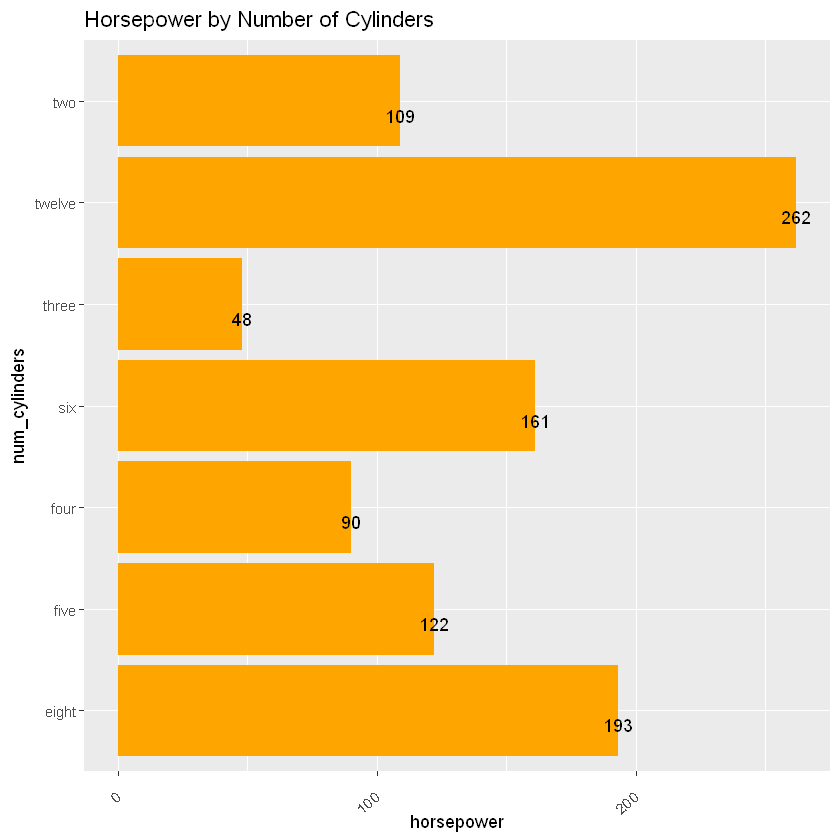

In [20]:
aggregated_data <- as.data.frame(aggregate(horsepower ~ num_cylinders, data = auto_data, FUN = mean))
aggregated_data$horsepower <- as.integer(aggregated_data$horsepower)
ggplot(data = aggregated_data, aes(x = horsepower, y = num_cylinders)) + 
  geom_bar(stat ='identity',fill = "orange") + 
  theme(axis.text.x = element_text(angle = 40,vjust = 0.5,hjust = 1)) + 
  geom_text(aes(label = horsepower, vjust = 1.5))+ ggtitle("Horsepower by Number of Cylinders") 


In [21]:
# cylinder vs mpg (city, highway)
mpg_summary <- auto_data %>%
  group_by(num_cylinders) %>%
  summarize(mean_city_mpg = round(mean(city_mpg)), mean_highway_mpg = round(mean(highway_mpg)))
mpg_summary

num_cylinders,mean_city_mpg,mean_highway_mpg
<chr>,<dbl>,<dbl>
eight,15,19
five,20,24
four,27,33
six,18,24
three,47,53
twelve,13,17
two,17,23


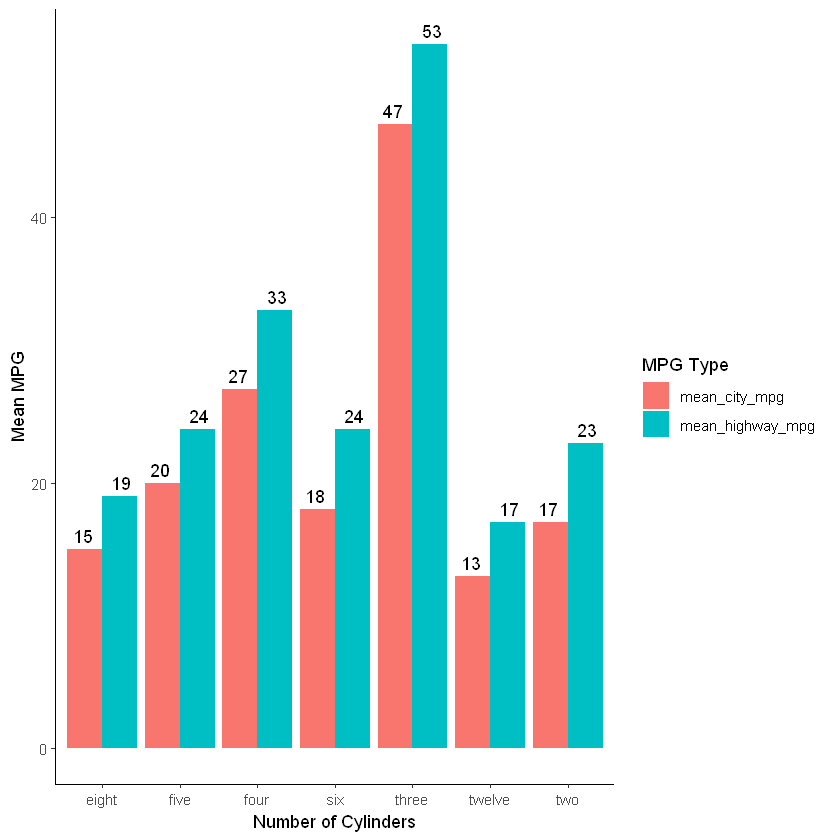

In [22]:
mpg_summary %>%
  pivot_longer(c(mean_city_mpg, mean_highway_mpg), 
               names_to = "mpg_type", 
               values_to = "mean_mpg") %>%
  ggplot(aes(x = num_cylinders, y = mean_mpg, fill = mpg_type)) + 
  geom_col(position = "dodge") + 
  geom_text(aes(label = round(mean_mpg, 1)), position = position_dodge(width = 1), vjust = -0.5) + 
  labs(x = "Number of Cylinders", y = "Mean MPG", fill = "MPG Type") + 
  theme_classic()

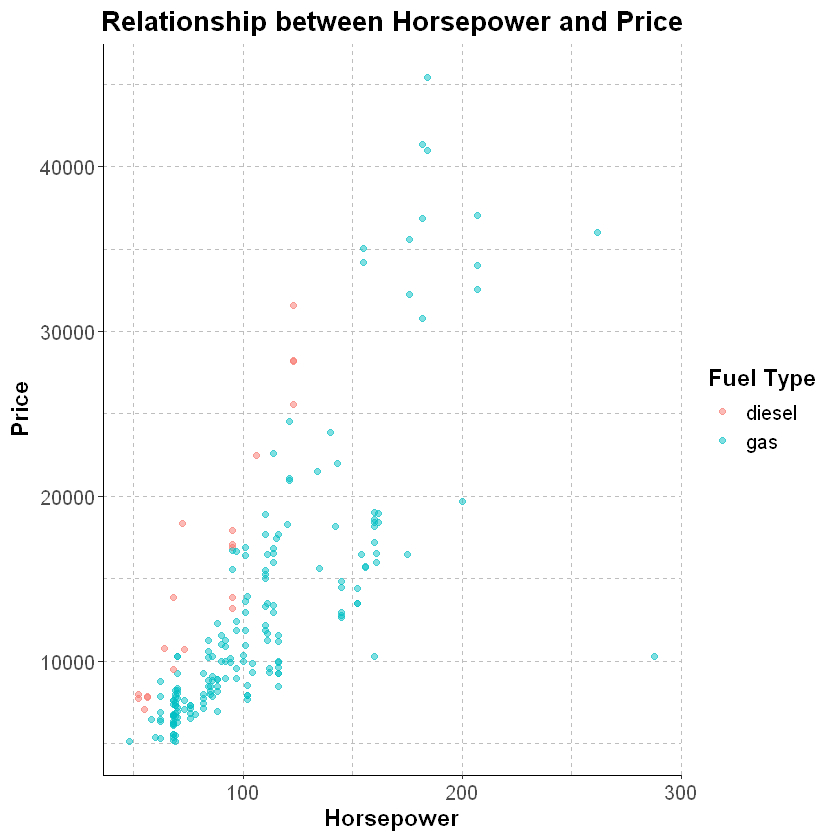

In [25]:
ggplot(auto_data, aes(x = horsepower, y = price, color = fuel_type)) + 
  geom_point(alpha = 0.5) + 
  labs(x = "Horsepower", y = "Price", color = "Fuel Type") + 
  theme_classic() + 
  theme(panel.grid.major = element_line(size = 0.5, linetype = "dashed", color = "gray"),
        panel.grid.minor = element_line(size = 0.5, linetype = "dashed", color = "gray"),
        axis.text = element_text(size = 12),
        axis.title = element_text(size = 14, face = "bold"),
        plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
        legend.text = element_text(size = 12),
        legend.title = element_text(size = 14, face = "bold")) + 
  ggtitle("Relationship between Horsepower and Price")